### 4. Numerical Integration - Euler Method

Author: Vignesh Sathyaseelan (vsathyas@purdue.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Euler's Method: ####

Euler method (also called forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. 

For a given first order ODE dy/dx = f(x,y) with y0 as initial condition. The numerical solution can be written as:

$$ y_{i+1} = y_{i} + f(x_{i},y_{i}) (x_{i+1} - x_{i});    (x_{i+1} - x_{i} = h) $$

where,

-  $y_{i}$ is the current value.
-  $y_{i+1}$ is the next estimated solution value. 
-  h is the interval between steps (h is taken to be a constant).
-  f($x_{i}$,$y_{i}$) is the value of the derivative at the current point ($x_{i}$,$y_{i}$) 


In [2]:
def odeint_euler(f,y_0,x_0,x_max,dx=0.01):
    
    x = np.arange(x_0, x_max, dx) 
    y = np.zeros(len(x))
    y[0] = y_0
    
    for i in range(0,len(y)-1):
        y[i+1] = y[i] + f(x[i],y[i])*dx
    
    return x,y

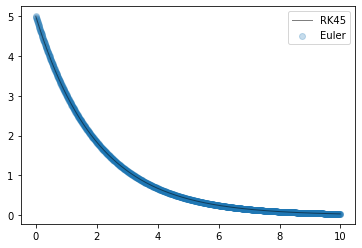

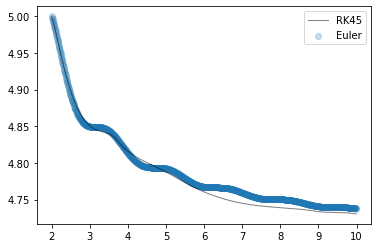

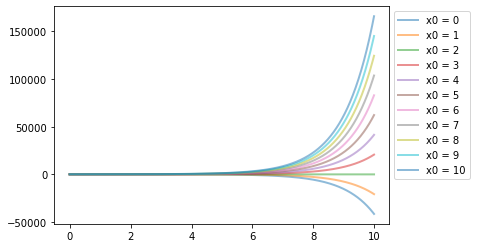

In [3]:
# Problem 1

#Initialise
x_min,x_max,x0 = 0.0,10.0,5.0

#Function Call
x,y = odeint_euler(lambda x,y : -0.5*y,x0,x_min,x_max) 
result_solve_ivp = solve_ivp(lambda x, y : -0.5*y, (x_min,x_max),[x0],method='RK45',t_eval=x)

#Plot Results
plt.figure()
plt.scatter(x,y,label='Euler',alpha=0.25)
plt.plot(result_solve_ivp.t,result_solve_ivp.y[0],label = 'RK45',alpha=0.5,color='black',linewidth=1.0)
plt.legend()
plt.show()

# Problem 2 (More complex functional form (RK45 outperforms))

#Initialise
x_min,x_max,x0 = 2.0,10.0,5.0


#Function Call
x,y = odeint_euler(lambda x,y : np.power(np.sin(2*x),2)/(1-np.power(x,2)),x0,x_min,x_max)
result_solve_ivp = solve_ivp(lambda x,y : np.power(np.sin(2*x),2)/(1-np.power(x,2)), (x_min,x_max),[x0],method='RK45',t_eval=x)

#Plot Results
plt.figure()
plt.scatter(x,y,label='Euler',alpha=0.25)
plt.plot(result_solve_ivp.t,result_solve_ivp.y[0],label = 'RK45',alpha=0.5,color='black',linewidth=1.0)
plt.legend()
plt.show()

#Problem 3 (Different Initial condition)

x_min,x_max = 0.0,10.0
x = np.arange(x_min,x_max,0.01)

plt.figure()

for i in range(0,11):
    x,y = odeint_euler(lambda x,y : y - np.power(x,2),i,x_min,x_max)
    plt.plot(x,y,label='x0 = {}'.format(i),alpha=0.5,linewidth=2.0)
    
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [4]:
def odeint_euler_system(f,s_0,t_0,t_max,dt):
    
    t = np.arange(t_0, t_max, dt) 
    s = np.zeros([len(t),s_0.size])
    s[0] = s_0
    for i in range(len(t)-1):
        s[i+1] = s[i] + f(t[i],s[i])*dt
    return s[:,0],s[:,1],t

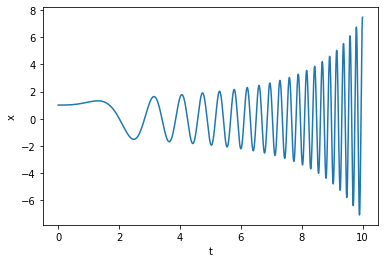

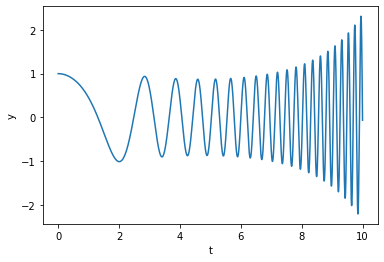

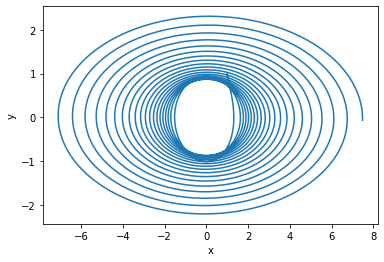

In [5]:
#Function Definition
S = lambda t,s : np.matmul(np.array([[0, t**2], [-t, 0]]), s)

#Function Call
x,y,t = odeint_euler_system(S,np.array([1,1]),0,10,0.001)

#Plotting

#X vs t
plt.figure()
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()


#Y vs t
plt.figure()
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

#X vs Y
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()